<a href="https://colab.research.google.com/github/kuzhuppillil/5LVOIxbwHNlv1lxA/blob/main/Term_Deposit_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install optuna
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.7 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from scipy.stats import iqr


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold



from imblearn.over_sampling import RandomOverSampler

import optuna


import warnings
warnings.filterwarnings("ignore")

from functools import partial
from hyperopt import hp, fmin, tpe, Trials


from catboost import CatBoostClassifier, Pool

In [4]:
df = pd.read_csv("/content/drive/Othercomputers/My Laptop/Apziva Projects/Term Deposit Marketing/term-deposit-marketing-2020.csv")
df.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
count,40000.000000,40000,40000,40000,40000,40000.000000,40000,40000,40000,40000.000000,40000,40000.000000,40000.000000,40000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,11,NaN,NaN,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,no
freq,NaN,9383,24386,20993,39191,NaN,24031,33070,24914,NaN,13532,NaN,NaN,37104
mean,40.544600,NaN,NaN,NaN,NaN,1274.277550,NaN,NaN,NaN,16.017225,NaN,254.824300,2.882175,NaN
std,9.641776,NaN,NaN,NaN,NaN,2903.769716,NaN,NaN,NaN,8.278127,NaN,259.366498,3.239051,NaN
min,19.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,54.000000,NaN,NaN,NaN,8.000000,NaN,100.000000,1.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,407.000000,NaN,NaN,NaN,17.000000,NaN,175.000000,2.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1319.000000,NaN,NaN,NaN,21.000000,NaN,313.000000,3.000000,NaN


In [5]:
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no
39999,38,technician,married,secondary,no,1442,yes,no,cellular,3,jun,113,1,no


In [6]:
len(df) - len(df.drop_duplicates())

0

**Observations:**



1.  No dupicates and null values.
2.  There are 40000 records with below attributes.
3.  Contains both binary and categorical attributes


**Attributes:**

    age : age of customer (numeric)
    job : type of job (categorical)
    marital : marital status (categorical)
    education (categorical)
    default: has credit in default? (binary)
    balance: average yearly balance, in euros (numeric)
    housing: has a housing loan? (binary)
    loan: has personal loan? (binary)
    contact: contact communication type (categorical)
    day: last contact day of the month (numeric)
    month: last contact month of year (categorical)
    duration: last contact duration, in seconds (numeric)
    campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    Output (desired target): y - has the client subscribed to a term deposit? (binary)


In [7]:
df['y'] = df['y'].str.replace('yes','1').str.replace('no','0').astype(int)
df['default'] = df['default'].str.replace('yes','1').str.replace('no','0').astype(int)
df['housing'] = df['housing'].str.replace('yes','1').str.replace('no','0').astype(int)
df['loan'] = df['loan'].str.replace('yes','1').str.replace('no','0').astype(int)
# df['marital'] = df['marital'].str.replace('single','0').str.replace('married','1').str.replace('divorced','2').astype(int)
# df['education'] = df['education'].str.replace('unknown','0').str.replace('primary','1').str.replace('secondary','2').str.replace('tertiary','3').astype(int)
# df['contact'] = df['contact'].str.replace('unknown','0').str.replace('cellular','1').str.replace('telephone','2').astype(int)
# month_mapping = {
#     'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov':11, 'dec': 12,
# }
# df['month'] = df['month'].map(month_mapping).astype(int)
# job_mapping = {
#     'unknown': 0, 'unemployed': 1, 'self-employed': 2, 'admin': 3, 'blue-collar': 4, 'entrepreneur': 5, 'management': 6, 'retired': 7, 'services': 8, 'student': 9, 'technician': 10, 'housemaid': 11,
# }
# df['job'] = df['job'].map(job_mapping).astype(int)

In [8]:
df.nunique()

age            70
job            12
marital         3
education       4
default         2
balance      6849
housing         2
loan            2
contact         3
day            31
month          11
duration     1535
campaign       48
y               2
dtype: int64

# EDA

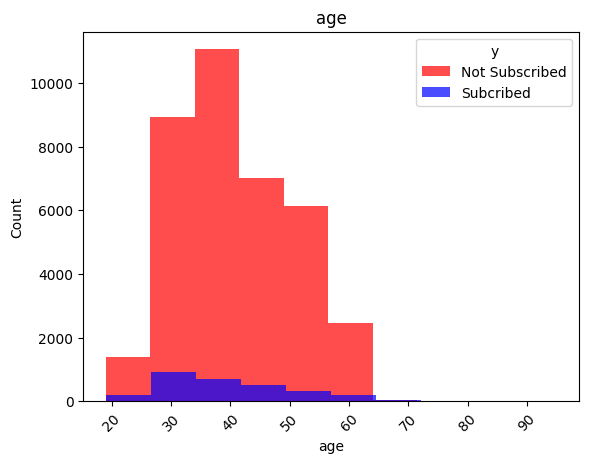

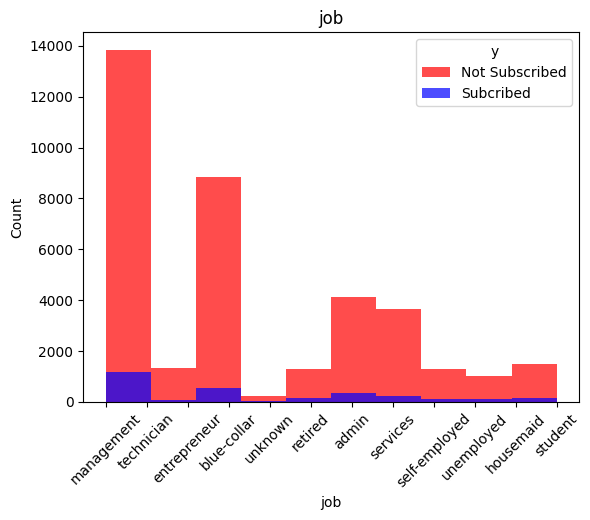

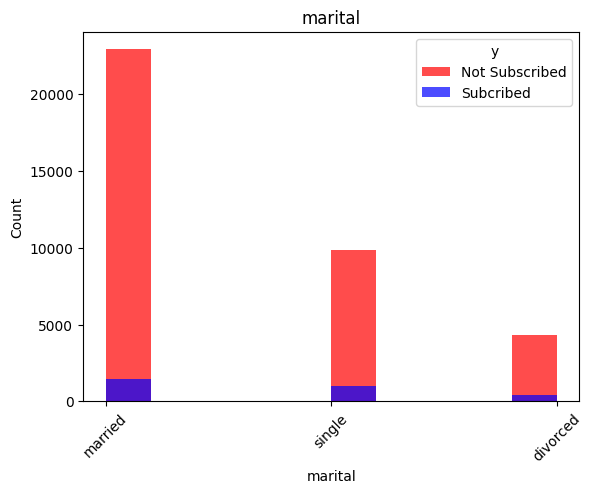

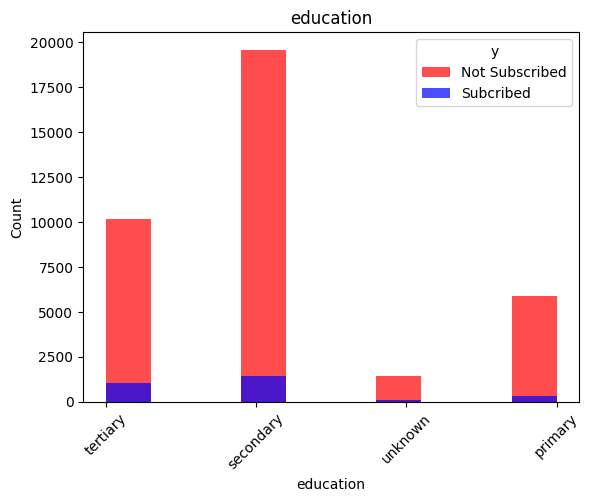

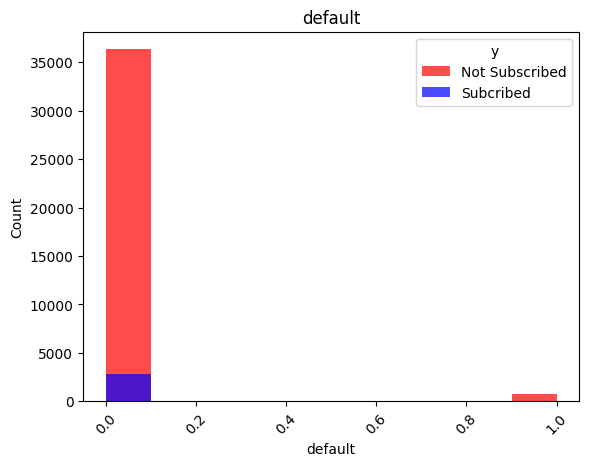

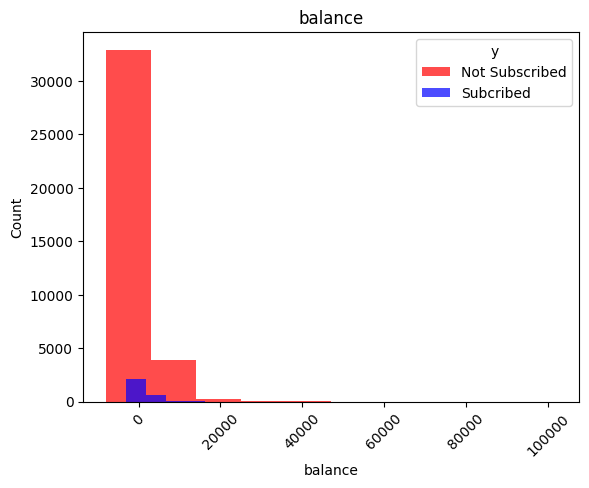

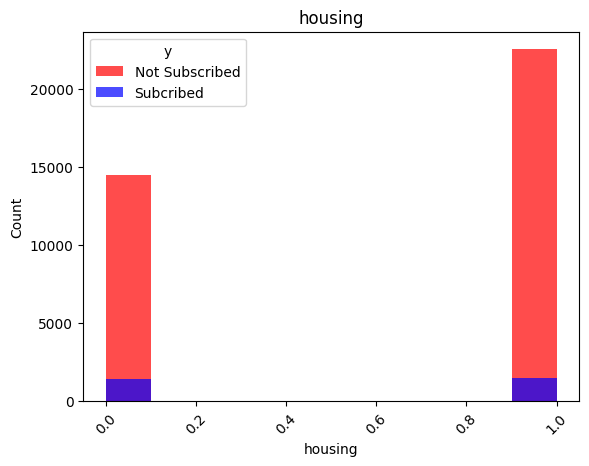

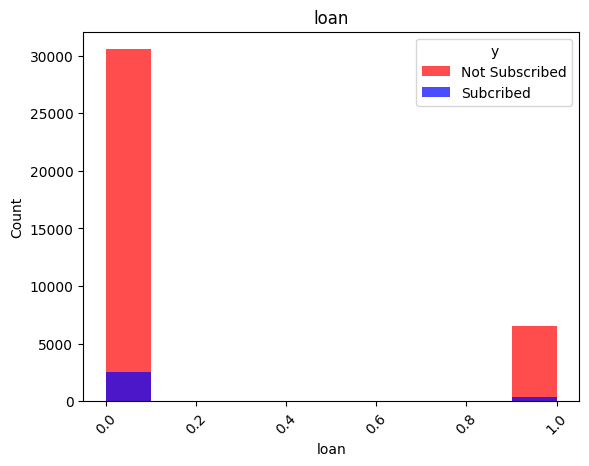

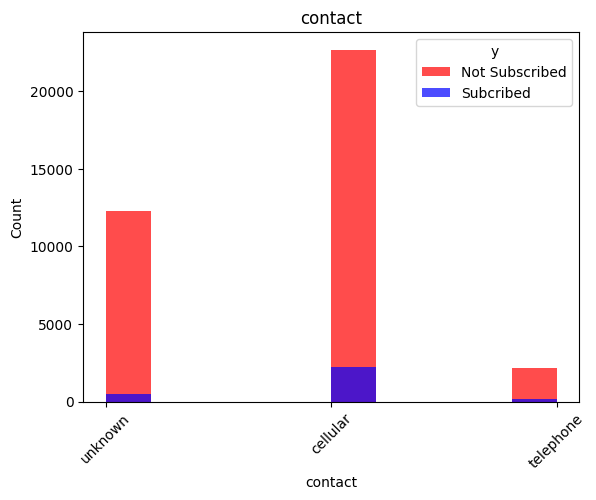

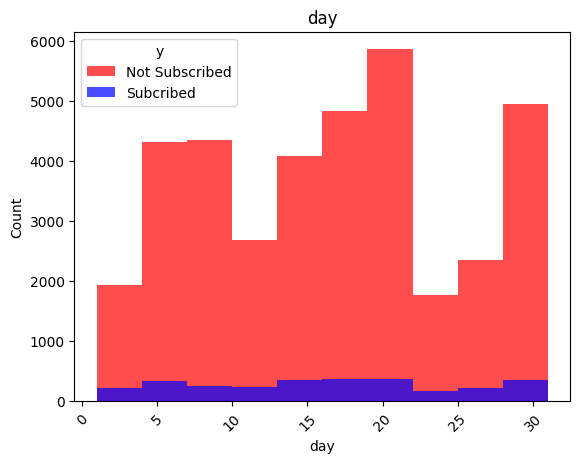

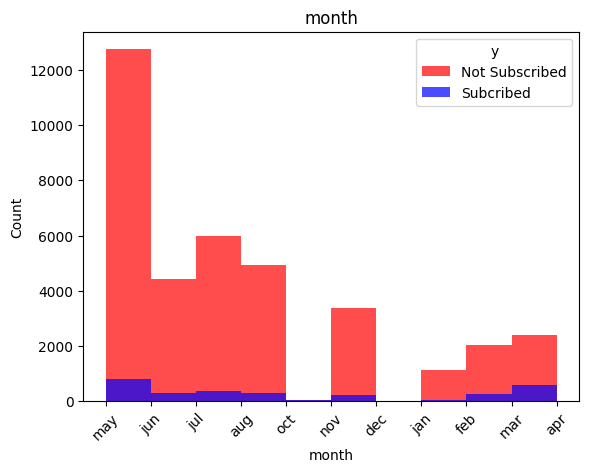

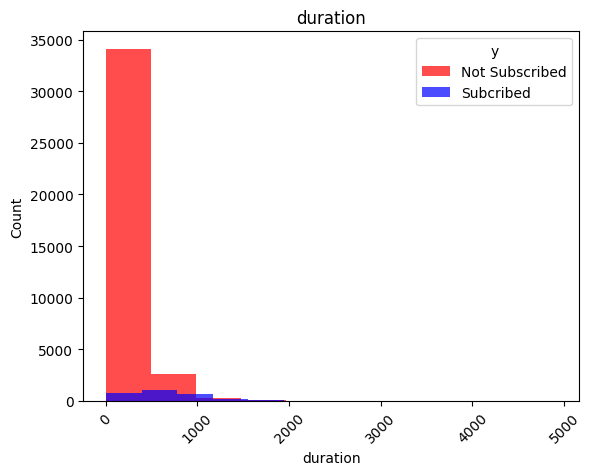

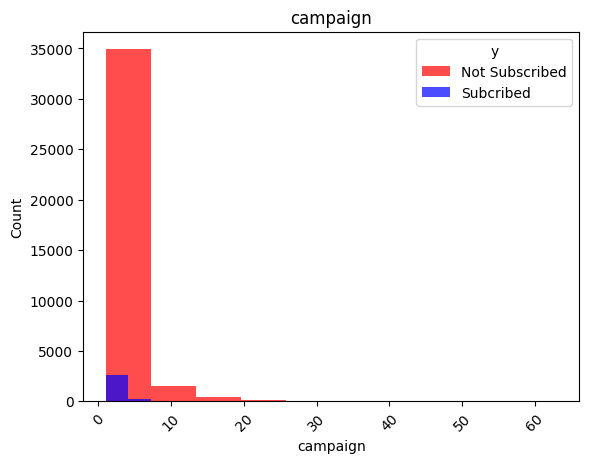

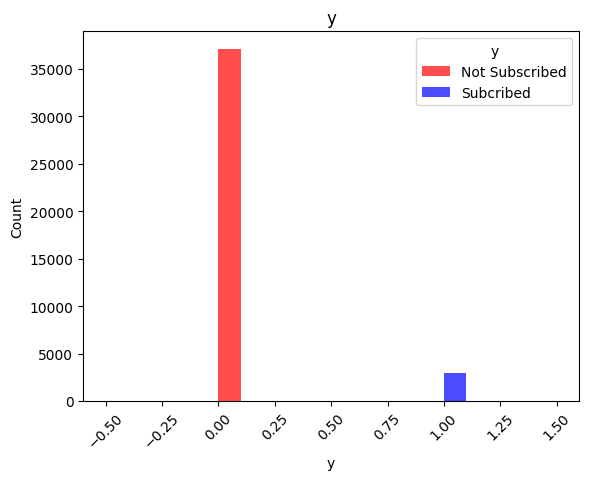

In [9]:

def hist(df):
  for feature in df.columns:
    #plt.hist(df[feature])
    plt.hist(df[df["y"]==0][feature], color='red', label ='Not Subscribed', alpha = 0.7, density = False)
    plt.hist(df[df["y"]==1][feature], color='blue', label ='Subcribed', alpha = 0.7, density =False)
    plt.title(feature)
    plt.ylabel("Count")
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.legend(title = 'y')
    plt.show()


hist(df)

**Histogram Observation:**

    1. The data exhibits a significant imbalance, with a predominant 'No' response, indicating that only a very small percentage of customers have subscribed to a term deposit.
    2. The majority of customers fall within the 30-50 age range.
    3. The job categories of Admin, Blue-collar, and Service encompass the largest portion of the customer base.
    4. Most customers are married.
    5. A majority of customers possess secondary education.
    6. The majority of customers do not have credit defaults.
    7. The majority of customers maintain a low average yearly balance, 8. typically falling within the 0-10,000 euro range. (This distribution may benefit from finer granularity for further analysis.)
    9. A significant portion of customers have housing loans.
    10. The majority of customers do not have personal loans.
    11. The primary mode of contact with customers is via cellular phones.
    12. The most common last contact day falls within the 16-22nd range of each month. (Consider using a bin size of 5 for a revised analysis.)
    13. The majority of customers were contacted in May.
    14. A more detailed analysis is required when examining duration.
    15. The majority of customers were contacted between 1-8 times. (This analysis may benefit from finer granularity.)

**Note: Campaign, Duration, Balance required further analysis to understand their distribution.**





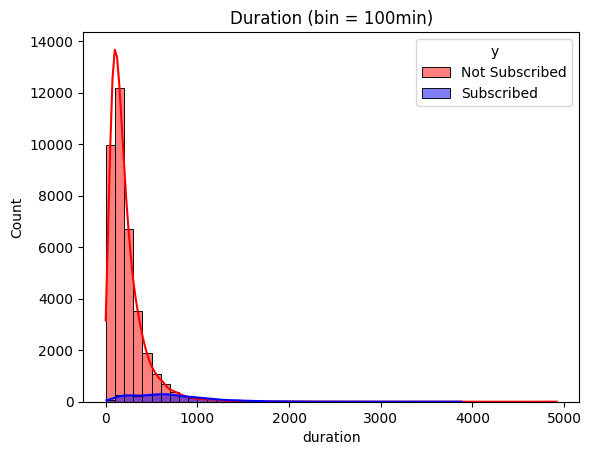

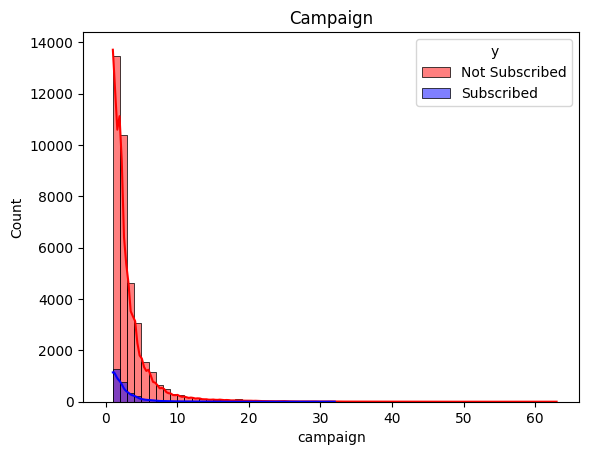

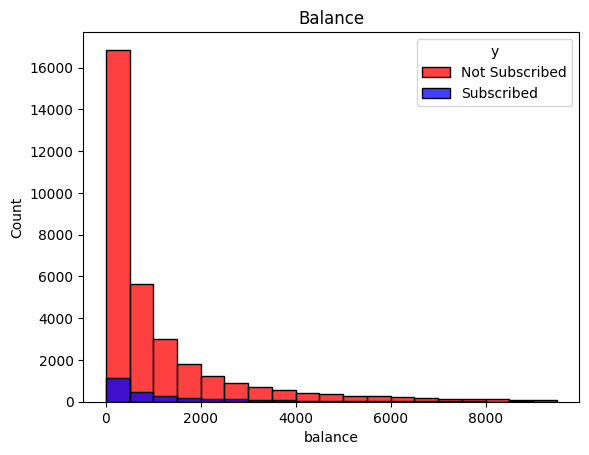

In [10]:

sns.histplot(data=df[df["y"]==0], x="duration", color='red', label ='Not Subscribed', bins = list(range(0, 2000,100 )), kde = True)
sns.histplot(data=df[df["y"]==1], x="duration", color='blue', label ='Subscribed', bins = list(range(0, 2000,100 )), kde = True)
plt.title('Duration (bin = 100min)')
plt.legend(title = 'y')
plt.show()

sns.histplot(data=df[df["y"]==0], x="campaign", color='red', label ='Not Subscribed', bins = list(range(0, 20,1 )), kde = True)
sns.histplot(data=df[df["y"]==1], x="campaign", color='blue', label ='Subscribed', bins = list(range(0, 20,1 )), kde = True)
plt.title('Campaign')
plt.legend(title = 'y')
plt.show()

sns.histplot(data=df[df["y"]==0], x="balance", color='red', label ='Not Subscribed', bins = list(range(0, 10000, 500)))
sns.histplot(data=df[df["y"]==1], x="balance", color='blue', label ='Subscribed', bins = list(range(0, 10000, 500)))
plt.title('Balance')
plt.legend(title = 'y')
plt.show()




**Histogram observation**

1. Majority of customers were engaed over call for a duration of 200 mins.
2. Majority of customers were called 1-2 times.
3. Majority of customers keep low average annual balance of under 500 euros.


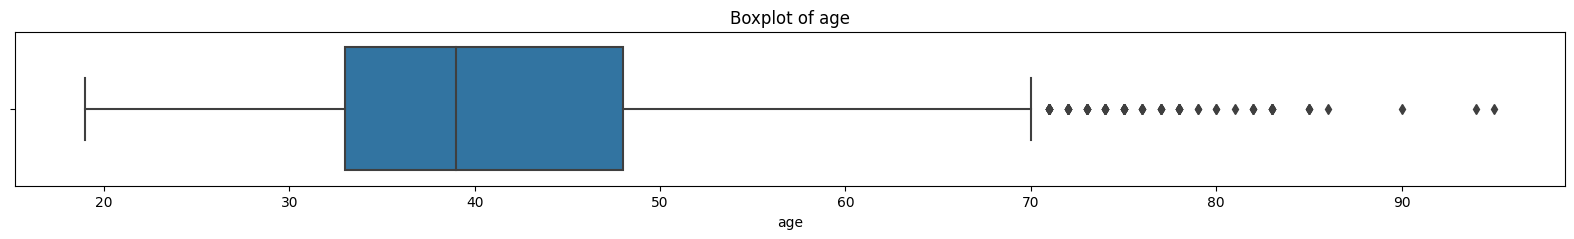

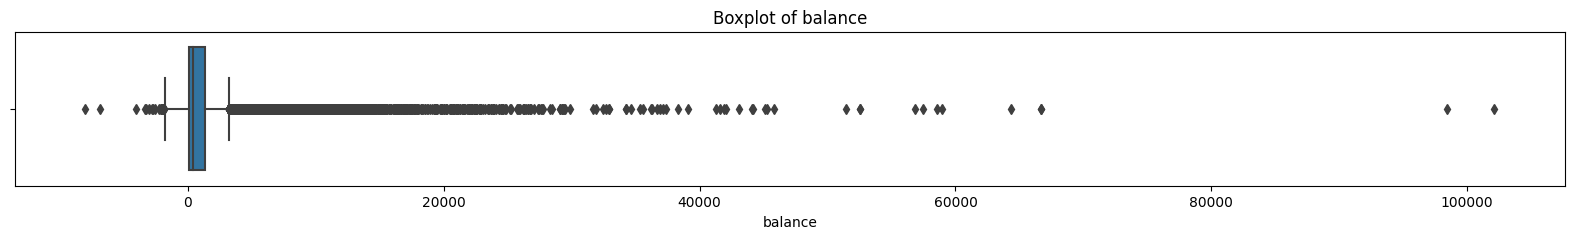

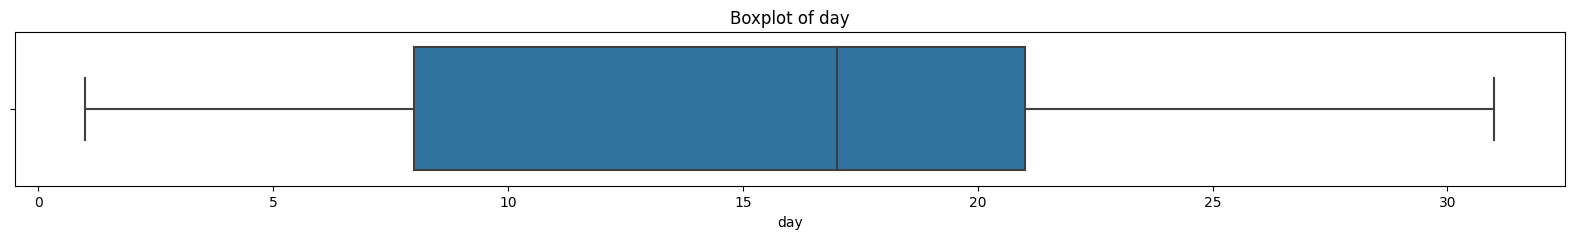

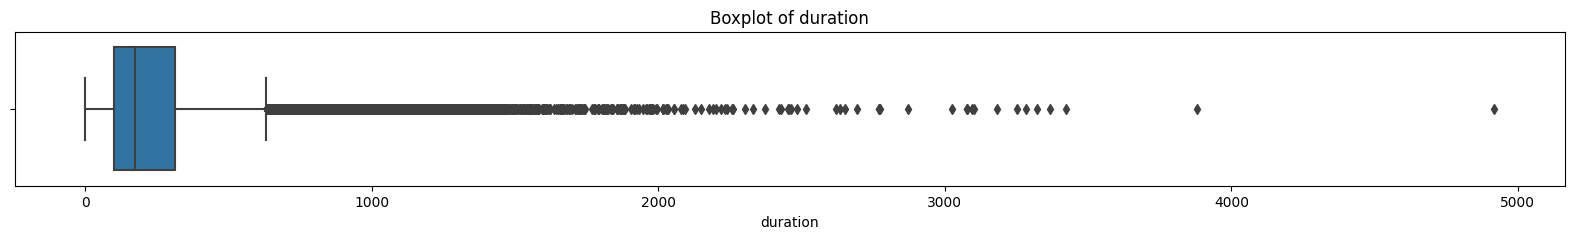

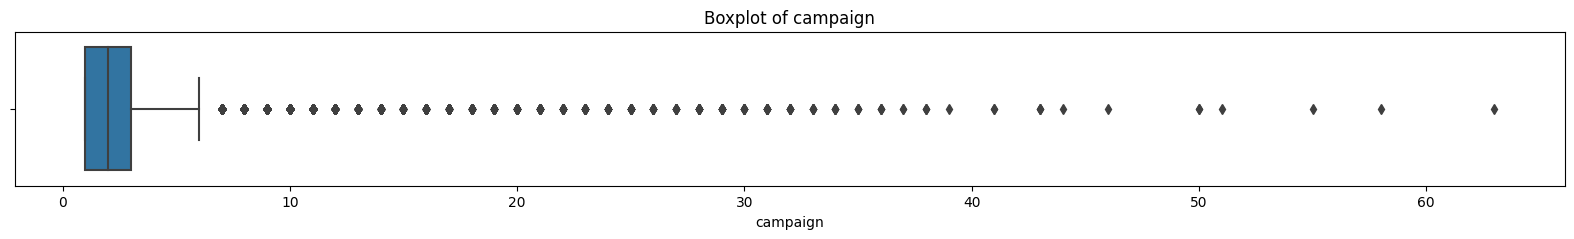


Column Name: age

Q1 = 33.0
Q3 = 48.0
IQR = 15.0
Lower Fence = 10.5
Upper Fence = 70.5
Count of Upper Outliers : 79
Count of Lower Outliers : 0

Column Name: balance

Q1 = 54.0
Q3 = 1319.0
IQR = 1265.0
Lower Fence = -1843.5
Upper Fence = 3216.5
Count of Upper Outliers : 4257
Count of Lower Outliers : 23

Column Name: day

Q1 = 8.0
Q3 = 21.0
IQR = 13.0
Lower Fence = -11.5
Upper Fence = 40.5
Count of Upper Outliers : 0
Count of Lower Outliers : 0

Column Name: duration

Q1 = 100.0
Q3 = 313.0
IQR = 213.0
Lower Fence = -219.5
Upper Fence = 632.5
Count of Upper Outliers : 3000
Count of Lower Outliers : 0

Column Name: campaign

Q1 = 1.0
Q3 = 3.0
IQR = 2.0
Lower Fence = -2.0
Upper Fence = 6.0
Count of Upper Outliers : 2992
Count of Lower Outliers : 0


In [11]:
numeric = ['age', 'balance','day','duration', 'campaign']

def box(numeric):
  for feat in df.columns:
    if feat in numeric:
      plt.figure(figsize = (20,2))
      sns.boxplot(x=df[feat])
      plt.title("Boxplot of " + feat)
      plt.show()


def outliers(col):
  Q1 = np.percentile(col, 25)
  Q3 = np.percentile(col, 75)
  IQR = Q3 - Q1
  print("\nColumn Name:", col.name)
  print("\nQ1 =",Q1)
  print("Q3 =",Q3)
  print("IQR =",IQR)
  upperf = Q3+1.5*IQR
  lowerf = Q1-1.5*IQR
  print("Lower Fence =",lowerf)
  print("Upper Fence =",upperf)
  upper_indices = np.where(col > upperf)
  lower_indices = np.where(col < lowerf)
  print("Count of Upper Outliers :",len(upper_indices[0]))
  print("Count of Lower Outliers :",len(lower_indices[0]))


box(numeric)

for col in numeric:
    outliers(df[col])


**Observation: **

There are few outliers, especially duration and balance contains too many outliers.

In [ ]:
# #normalizing data to reduce outliers

# def log_transform(x):
#     if x < 0:
#         return np.log1p(abs(x))
#     else:
#         return np.log1p(x)

# df['balance'] = df['balance'].apply(log_transform)
# df['duration'] = df['duration'].apply(log_transform)
# df['campaign'] = df['campaign'].apply(log_transform)



# numeric = ['balance','duration','campaign']
# box(numeric)

# for col in numeric:
#     outliers(df[col])

Observation:

Duration and balance is normalised with reduced outliers. However the normalization reduced the model accuracy, hence the step is skipped.

# **Onehot Encoding**

In [13]:
#converting the categorical variables

df = pd.get_dummies(df)

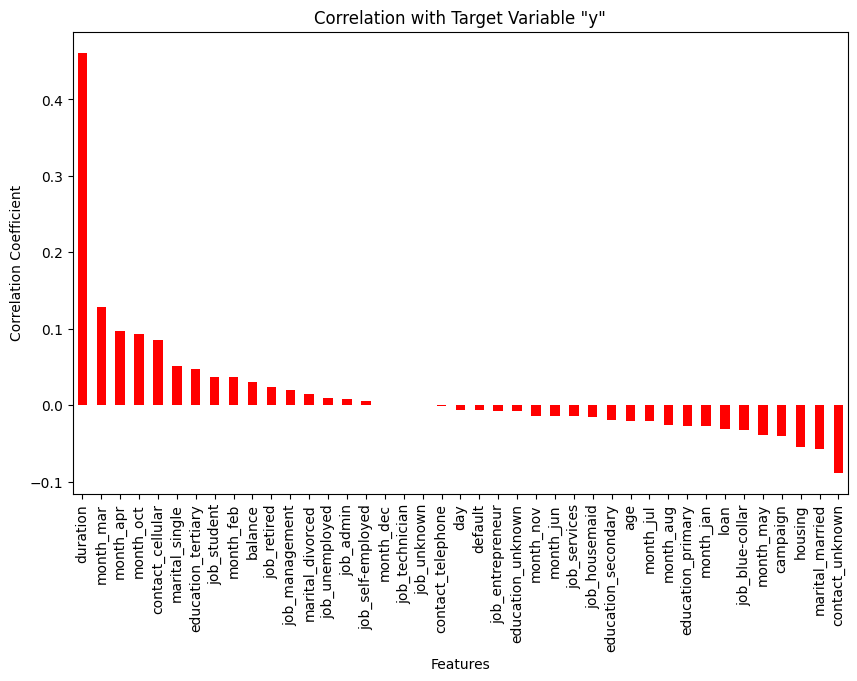

In [14]:
corr = df.corr()['y'].sort_values(ascending = False)[1:]
plt.figure(figsize=(10, 6))
corr.plot(kind='bar', color='red')
plt.title('Correlation with Target Variable "y"')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.show()

Duration has the highest positive correlation of 0.4



In [15]:
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  40000 non-null  int64
 1   default              40000 non-null  int64
 2   balance              40000 non-null  int64
 3   housing              40000 non-null  int64
 4   loan                 40000 non-null  int64
 5   day                  40000 non-null  int64
 6   duration             40000 non-null  int64
 7   campaign             40000 non-null  int64
 8   y                    40000 non-null  int64
 9   job_admin            40000 non-null  uint8
 10  job_blue-collar      40000 non-null  uint8
 11  job_entrepreneur     40000 non-null  uint8
 12  job_housemaid        40000 non-null  uint8
 13  job_management       40000 non-null  uint8
 14  job_retired          40000 non-null  uint8
 15  job_self-employed    40000 non-null  uint8
 16  job_services         4

,age,default,balance,housing,loan,day,duration,campaign,y,job_admin,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
39995,53,0,395,0,0,3,107,1,0,0,...,0,0,0,0,0,1,0,0,0,0
39996,30,0,3340,0,0,3,238,3,1,0,...,0,0,0,0,0,1,0,0,0,0
39997,54,0,200,0,0,3,170,1,1,1,...,0,0,0,0,0,1,0,0,0,0
39998,34,0,1047,0,0,3,342,1,0,0,...,0,0,0,0,0,1,0,0,0,0
39999,38,0,1442,1,0,3,113,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [16]:
train, temp = train_test_split(df, test_size=0.4, random_state=100)
valid, test = train_test_split(temp, test_size=0.5, random_state=100)

In [17]:
print(len(train[train['y']==1]))

print(len(train[train['y']==0]))

1741
22259


In [18]:
def scale_dataset(df,oversample = False):
  X = df.drop('y',axis =1)
  y = df['y']

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X,y)

  data = np.column_stack((X, y))

  return data, X, y

In [19]:
train_scaled, X_train, y_train = scale_dataset(train, oversample = True)
valid_scaled, X_valid, y_valid = scale_dataset(valid, oversample = False)
test_scaled, X_test, y_test = scale_dataset(test, oversample = False)

In [20]:
sum(y_train == 1)


22259

In [21]:
sum(y_train == 0)

22259

# Model Training and Crossvalidation  (SKF with 5 Fold)

In [22]:
def training_cross_val(model,folds,rs):
  skf = StratifiedKFold(n_splits=folds,shuffle = True, random_state = rs)

  Accuracy_vals = cross_val_score(model,X_train,y_train,cv = skf)

  print("\nModel: ",model)
  print("\nAll scores", Accuracy_vals)
  print("Minimum Accuracy:", min(Accuracy_vals)*100)
  print("Maximum Accuracy:", max(Accuracy_vals)*100)
  print("Average Accuracy:", np.mean(Accuracy_vals)*100,"\n")

In [23]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lgbm = LGBMClassifier(verbose = -1)

models = [rf,lgbm,lr,knn,dt]

for i in models:
  training_cross_val(i,5,46)


Model:  RandomForestClassifier()

All scores [0.98371518 0.98214286 0.98304133 0.98225317 0.9855105 ]
Minimum Accuracy: 98.21428571428571
Maximum Accuracy: 98.55105020779511
Average Accuracy: 98.33326092469713 


Model:  LGBMClassifier(verbose=-1)

All scores [0.94440701 0.9368823  0.93823001 0.93080984 0.9347411 ]
Minimum Accuracy: 93.08098393799843
Maximum Accuracy: 94.44070080862534
Average Accuracy: 93.70140510093864 


Model:  LogisticRegression()

All scores [0.87174304 0.86803684 0.86938455 0.86229361 0.86566326]
Minimum Accuracy: 86.22936088958778
Maximum Accuracy: 87.17430368373765
Average Accuracy: 86.74242577912953 


Model:  KNeighborsClassifier()

All scores [0.95035939 0.94856244 0.94654088 0.94675952 0.94687184]
Minimum Accuracy: 94.65408805031447
Maximum Accuracy: 95.03593890386344
Average Accuracy: 94.78188147205799 


Model:  DecisionTreeClassifier()

All scores [0.97517969 0.97383199 0.97473046 0.97674941 0.97495226]
Minimum Accuracy: 97.38319856244384
Maximum Accur

# Model Fit Validation

In [24]:
def model_validation(models):
  for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    print("\nAccuracy of ",model," :", accuracy*100,"%")
    print("\nClassification Report: \n", classification_report(y_valid,y_pred))


In [25]:
model_validation(models)


Accuracy of  RandomForestClassifier()  : 93.63749999999999 %

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      7413
           1       0.59      0.45      0.51       587

    accuracy                           0.94      8000
   macro avg       0.77      0.71      0.74      8000
weighted avg       0.93      0.94      0.93      8000


Accuracy of  LGBMClassifier(verbose=-1)  : 89.1375 %

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.89      0.94      7413
           1       0.39      0.89      0.55       587

    accuracy                           0.89      8000
   macro avg       0.69      0.89      0.74      8000
weighted avg       0.95      0.89      0.91      8000


Accuracy of  LogisticRegression()  : 87.1125 %

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.87      0.93      

# Model Test

In [26]:
def model_test(models):
  for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAccuracy of ",model," :", accuracy*100,"%")
    print("\nClassification Report: \n", classification_report(y_test,y_pred))


In [27]:
model_test(models)


Accuracy of  RandomForestClassifier()  : 93.2 %

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      7432
           1       0.53      0.41      0.46       568

    accuracy                           0.93      8000
   macro avg       0.74      0.69      0.71      8000
weighted avg       0.93      0.93      0.93      8000


Accuracy of  LGBMClassifier(verbose=-1)  : 89.225 %

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.89      0.94      7432
           1       0.39      0.89      0.54       568

    accuracy                           0.89      8000
   macro avg       0.69      0.89      0.74      8000
weighted avg       0.95      0.89      0.91      8000


Accuracy of  LogisticRegression()  : 86.625 %

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.87      0.92      7432
          

# Feature Importance


In [30]:

df_temp = df.drop('y',axis =1)

def get_feature_importance(mod, col_names):
    feature_importance = pd.DataFrame({
        'variable': col_names,
        'coefficient': mod.coef_[0]
    }).round(decimals=2).sort_values('coefficient',ascending = False).style.bar(color = ['red','blue'],align = 'zero')


    return feature_importance

                feature  importance
6              duration    0.459693
2               balance    0.075948
5                   day    0.075634
0                   age    0.064257
7              campaign    0.033244
30            month_apr    0.023117
37            month_mar    0.021964
3               housing    0.019587
29      contact_unknown    0.018752
27     contact_cellular    0.015969
33            month_feb    0.015235
35            month_jul    0.011633
38            month_may    0.010035
36            month_jun    0.009324
4                  loan    0.009110
31            month_aug    0.008706
40            month_oct    0.008393
39            month_nov    0.008389
9       job_blue-collar    0.008192
24  education_secondary    0.008109
25   education_tertiary    0.007798
22       marital_single    0.007706
21      marital_married    0.007643
17       job_technician    0.007474
12       job_management    0.007473
8             job_admin    0.006629
23    education_primary    0

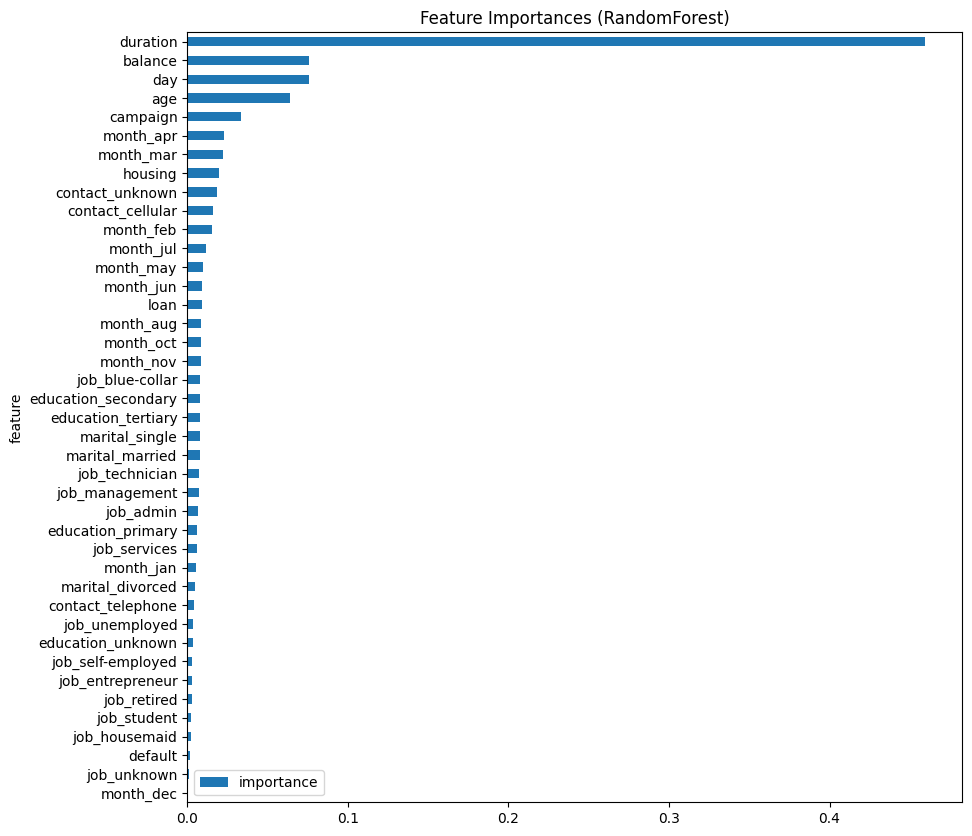

In [31]:
importances = rf.feature_importances_
feature_df = pd.DataFrame({'feature':df_temp.columns, 'importance':importances})

feature_df.sort_values('importance').plot.barh(y='importance', x='feature', figsize=(10,10))
plt.title('Feature Importances (RandomForest)')

print(feature_df.sort_values('importance', ascending=False))

In [32]:
#LR feature importance
get_feature_importance(lr, df_temp.columns)

,variable,coefficient
6,duration,1.930000
36,month_jun,0.510000
27,contact_cellular,0.480000
37,month_mar,0.300000
33,month_feb,0.280000
30,month_apr,0.280000
40,month_oct,0.260000
28,contact_telephone,0.250000
5,day,0.230000
38,month_may,0.160000


# **Hyperparameter tuning for RandomForest**

In [33]:
def optimize(trial, x, y):
  params = {
          "n_estimators": trial.suggest_int("n_estimators", 5, 505, 10),
          "max_depth": trial.suggest_int("max_depth", 3, 20, 1),
          "random_state": trial.suggest_int("random_state", 0, 110, 10),
          "criterion": trial.suggest_categorical("criterion", ["gini", "entropy"]),
          "max_features": trial.suggest_float("max_features", 0.01, 1.0)
      }

  model = RandomForestClassifier(**params)

  skf = StratifiedKFold(n_splits=5)
  accuracy = []

  for train_index, test_index in skf.split(X=x,y=y):
    Xtrain, Xtest, ytrain, ytest = X.iloc[train_index], X.iloc[test_index], y[train_index], y[test_index]

    model.fit(Xtrain,ytrain)
    preds = model.predict(Xtest)
    acc = accuracy_score(ytest,preds)
    accuracy.append(acc)

  print("\nAll scores", accuracy)
  print("Minimum Accuracy:", min(accuracy)*100)
  print("Maximum Accuracy:", max(accuracy)*100)
  print("Average accuracy is ",np.mean(accuracy)*100)
  print("\nNext trial starts--------------\n")

  return np.mean(accuracy)

In [34]:
X = pd.DataFrame(data = X_train,columns = df_temp.columns)
y = y_train

optimization_function = partial(
    optimize,
    x=X,
    y=y
)

study = optuna.create_study(direction= "maximize")
study.optimize(optimization_function, n_trials = 10 )
optimal_param = study.best_params
best_trial = study.best_trial
print("\nBest trial:",best_trial)
print("\nBest parameter for RF is",optimal_param)

[I 2023-10-16 18:22:30,454] A new study created in memory with name: no-name-5e562ed6-dbca-4cfc-8ac3-5ffd63c8d82c
[I 2023-10-16 18:22:41,190] Trial 0 finished with value: 0.9188643040964921 and parameters: {'n_estimators': 95, 'max_depth': 11, 'random_state': 0, 'criterion': 'entropy', 'max_features': 0.0370296470397576}. Best is trial 0 with value: 0.9188643040964921.



All scores [0.9149820305480683, 0.9181266846361186, 0.9223944294699011, 0.9140739076715714, 0.9247444681568011]
Minimum Accuracy: 91.40739076715714
Maximum Accuracy: 92.47444681568011
Average accuracy is  91.88643040964921

Next trial starts--------------



[I 2023-10-16 18:23:15,257] Trial 1 finished with value: 0.9725055224830582 and parameters: {'n_estimators': 55, 'max_depth': 19, 'random_state': 80, 'criterion': 'gini', 'max_features': 0.6298870936227383}. Best is trial 1 with value: 0.9725055224830582.



All scores [0.9738319856244384, 0.972596585804133, 0.9702380952380952, 0.9712456475345389, 0.9746152982140851]
Minimum Accuracy: 97.02380952380952
Maximum Accuracy: 97.4615298214085
Average accuracy is  97.25055224830582

Next trial starts--------------



[I 2023-10-16 18:24:04,155] Trial 2 finished with value: 0.8845636721179522 and parameters: {'n_estimators': 125, 'max_depth': 6, 'random_state': 90, 'criterion': 'gini', 'max_features': 0.7123106935256031}. Best is trial 1 with value: 0.9725055224830582.



All scores [0.8787061994609164, 0.881513926325247, 0.887915543575921, 0.8844209816915647, 0.8902617095361114]
Minimum Accuracy: 87.87061994609164
Maximum Accuracy: 89.02617095361114
Average accuracy is  88.45636721179521

Next trial starts--------------



[I 2023-10-16 18:25:57,892] Trial 3 finished with value: 0.927579833927387 and parameters: {'n_estimators': 245, 'max_depth': 10, 'random_state': 50, 'criterion': 'gini', 'max_features': 0.49664670035175984}. Best is trial 1 with value: 0.9725055224830582.



All scores [0.9254267744833783, 0.9284591194968553, 0.929806828391734, 0.9226103560597552, 0.9315960912052117]
Minimum Accuracy: 92.26103560597552
Maximum Accuracy: 93.15960912052117
Average accuracy is  92.7579833927387

Next trial starts--------------



[I 2023-10-16 18:26:40,643] Trial 4 finished with value: 0.8683904009258617 and parameters: {'n_estimators': 215, 'max_depth': 6, 'random_state': 50, 'criterion': 'entropy', 'max_features': 0.27320099570205103}. Best is trial 1 with value: 0.9725055224830582.



All scores [0.8645552560646901, 0.8656783468104223, 0.8710691823899371, 0.8673480849151971, 0.8733011344490621]
Minimum Accuracy: 86.45552560646901
Maximum Accuracy: 87.3301134449062
Average accuracy is  86.83904009258617

Next trial starts--------------



[I 2023-10-16 18:26:49,950] Trial 5 finished with value: 0.895053576840297 and parameters: {'n_estimators': 5, 'max_depth': 7, 'random_state': 40, 'criterion': 'gini', 'max_features': 0.9531094626195814}. Best is trial 1 with value: 0.9725055224830582.



All scores [0.890947888589398, 0.8951033243486074, 0.9039757412398922, 0.8914972481186118, 0.8937436819049759]
Minimum Accuracy: 89.0947888589398
Maximum Accuracy: 90.39757412398922
Average accuracy is  89.50535768402969

Next trial starts--------------



[I 2023-10-16 18:27:04,229] Trial 6 finished with value: 0.8536770417393654 and parameters: {'n_estimators': 185, 'max_depth': 5, 'random_state': 60, 'criterion': 'gini', 'max_features': 0.048653303618139326}. Best is trial 1 with value: 0.9725055224830582.



All scores [0.8559074573225517, 0.8516397124887691, 0.8589398023360287, 0.8488150061776929, 0.8530832303717848]
Minimum Accuracy: 84.88150061776929
Maximum Accuracy: 85.89398023360287
Average accuracy is  85.36770417393654

Next trial starts--------------



[I 2023-10-16 18:27:44,134] Trial 7 finished with value: 0.9053866146858438 and parameters: {'n_estimators': 85, 'max_depth': 8, 'random_state': 0, 'criterion': 'gini', 'max_features': 0.7168075920573435}. Best is trial 1 with value: 0.9725055224830582.



All scores [0.8986972147349506, 0.9039757412398922, 0.9121743036837376, 0.9027294170504324, 0.9093563967202066]
Minimum Accuracy: 89.86972147349506
Maximum Accuracy: 91.21743036837377
Average accuracy is  90.53866146858438

Next trial starts--------------



[I 2023-10-16 18:28:21,205] Trial 8 finished with value: 0.9427872924912295 and parameters: {'n_estimators': 135, 'max_depth': 12, 'random_state': 10, 'criterion': 'gini', 'max_features': 0.2876655172499405}. Best is trial 1 with value: 0.9725055224830582.



All scores [0.9398023360287511, 0.9413746630727763, 0.9424977538185085, 0.9417050432438504, 0.948556666292261]
Minimum Accuracy: 93.9802336028751
Maximum Accuracy: 94.85566662922609
Average accuracy is  94.27872924912295

Next trial starts--------------



[I 2023-10-16 18:32:37,098] Trial 9 finished with value: 0.9737634244854622 and parameters: {'n_estimators': 445, 'max_depth': 20, 'random_state': 40, 'criterion': 'gini', 'max_features': 0.5646766513108958}. Best is trial 9 with value: 0.9737634244854622.



All scores [0.9742812219227314, 0.9745058400718778, 0.9723719676549866, 0.972368864427721, 0.9752892283499944]
Minimum Accuracy: 97.2368864427721
Maximum Accuracy: 97.52892283499945
Average accuracy is  97.37634244854621

Next trial starts--------------


Best trial: FrozenTrial(number=9, state=TrialState.COMPLETE, values=[0.9737634244854622], datetime_start=datetime.datetime(2023, 10, 16, 18, 28, 21, 208045), datetime_complete=datetime.datetime(2023, 10, 16, 18, 32, 37, 98054), params={'n_estimators': 445, 'max_depth': 20, 'random_state': 40, 'criterion': 'gini', 'max_features': 0.5646766513108958}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=505, log=False, low=5, step=10), 'max_depth': IntDistribution(high=20, log=False, low=3, step=1), 'random_state': IntDistribution(high=110, log=False, low=0, step=10), 'criterion': CategoricalDistribution(choices=('gini', 'entropy')), 'max_features': FloatDistribution(high=1.0, log=

In [35]:
rf_hyp = RandomForestClassifier(**optimal_param)
training_cross_val(rf_hyp,5,40)


Model:  RandomForestClassifier(max_depth=20, max_features=0.5646766513108958,
                       n_estimators=445, random_state=40)

All scores [0.97663971 0.97270889 0.97394429 0.97551387 0.9720319 ]
Minimum Accuracy: 97.20318993597664
Maximum Accuracy: 97.66397124887692
Average Accuracy: 97.41677346309767 



In [36]:
models = [rf_hyp]
model_validation(models)
model_test(models)


Accuracy of  RandomForestClassifier(max_depth=20, max_features=0.5646766513108958,
                       n_estimators=445, random_state=40)  : 93.2625 %

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      7413
           1       0.54      0.62      0.58       587

    accuracy                           0.93      8000
   macro avg       0.75      0.79      0.77      8000
weighted avg       0.94      0.93      0.93      8000


Accuracy of  RandomForestClassifier(max_depth=20, max_features=0.5646766513108958,
                       n_estimators=445, random_state=40)  : 92.7875 %

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      7432
           1       0.49      0.58      0.53       568

    accuracy                           0.93      8000
   macro avg       0.73      0.77      0.75      8000
weighted avg       0.93      0.93      

# **Catboost Tryout**

In [37]:
#trying catboost
X = df.drop('y',axis=1)
y = df['y']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=100)


cat_model = CatBoostClassifier(
    iterations = 1000,
    bootstrap_type = "Bayesian",
    random_strength = 0.5,
    depth = 7,
    l2_leaf_reg = 5,
    learning_rate=0.1,
    bagging_temperature = 0.5,
    verbose = 0
)


cat_model.fit(X_train,y_train)

y_pred_cat = cat_model.predict(X_test)

print("accuracy of the catboost: ",accuracy_score(y_test,y_pred_cat))
print("\nClassification Report: \n", classification_report(y_test,y_pred_cat))


accuracy of the catboost:  0.937125

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14845
           1       0.59      0.43      0.50      1155

    accuracy                           0.94     16000
   macro avg       0.77      0.70      0.73     16000
weighted avg       0.93      0.94      0.93     16000



                feature  importance
6              duration   23.181439
5                   day   10.904305
2               balance   10.222111
0                   age    8.382123
7              campaign    6.151638
29      contact_unknown    4.571297
38            month_may    3.722185
35            month_jul    2.813644
31            month_aug    2.748871
27     contact_cellular    2.641565
3               housing    2.562301
30            month_apr    1.774046
9       job_blue-collar    1.607211
21      marital_married    1.456492
25   education_tertiary    1.293237
39            month_nov    1.281527
17       job_technician    1.245392
36            month_jun    1.243366
33            month_feb    1.226186
4                  loan    1.166628
24  education_secondary    1.159486
12       job_management    1.149656
23    education_primary    1.083797
22       marital_single    1.023270
34            month_jan    0.971667
8             job_admin    0.705166
15         job_services    0

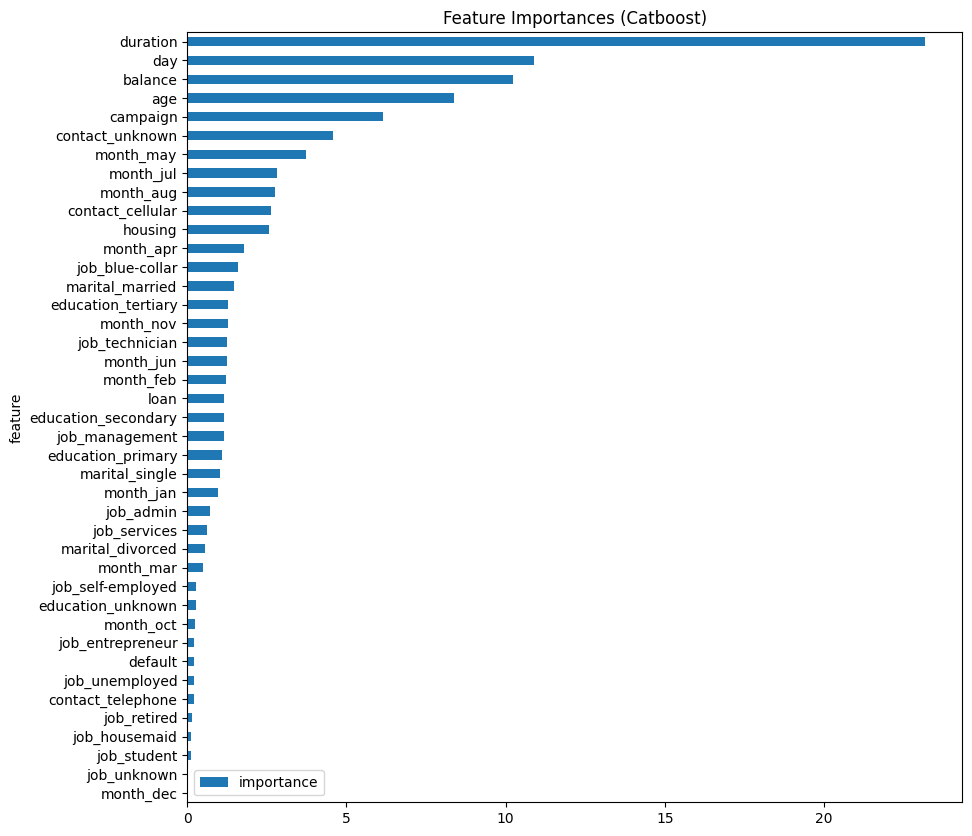

In [39]:
importances = cat_model.feature_importances_
feature_df = pd.DataFrame({'feature':X.columns, 'importance':importances})

feature_df.sort_values('importance').plot.barh(y='importance', x='feature', figsize=(10,10))
plt.title('Feature Importances (Catboost)')

print(feature_df.sort_values('importance', ascending=False))

# **Customer Segmentation**

In [58]:


# Duration
df['duration_rank'] = pd.qcut(df['duration'], q=3, labels=[3,2,1])

# Balance
df['balance_rank'] = pd.qcut(df['balance'], q=3, labels=[3,2,1])

# Day
df['day_rank'] = pd.qcut(df['day'], q=3, labels=[3,2,1])

# Age
df['age_rank'] = pd.qcut(df['age'], q=3, labels=[1,2,3])

# Campaign

df['campaign_rank'] = pd.qcut(df['campaign'], q=3, labels=[1,2,3])



df['duration_rank'] = df['duration_rank'].astype(float)
df['balance_rank'] = df['balance_rank'].astype(float)
df['day_rank'] = df['day_rank'].astype(float)
df['age_rank'] = df['age_rank'].astype(float)
df['campaign_rank'] = df['campaign_rank'].astype(float)

# Create customer priority score#
df['cust_priority'] = df['duration_rank']*0.457 + df['balance_rank']*0.077 + df['day_rank']*0.076 + df['age_rank']*0.065 + df['campaign_rank']*0.033

# View priority segments
print(df.groupby('cust_priority').size())


#print(df[df['cust_priority']>7].groupby('cust_priority').size())

ValueError: ignored

In [64]:

duration_bins = [0, 100, 250, 500, 1000]
balance_bins = [-8000, 0, 1000, 5000, 20000]
day_bins = [1, 10, 20, 31]
age_bins = [19, 30, 40, 60, 100]
campaign_bins = [1, 2, 5, 20]

# Apply binning to each attribute
df['duration_rank'] = pd.cut(df['duration'], bins=duration_bins, labels=[1, 2, 3, 4])
df['balance_rank'] = pd.cut(df['balance'], bins=balance_bins, labels=[1, 2, 3, 4])
df['day_rank'] = pd.cut(df['day'], bins=day_bins, labels=[1, 2, 3])
df['age_rank'] = pd.cut(df['age'], bins=age_bins, labels=[1, 2, 3, 4])
df['campaign_rank'] = pd.cut(df['campaign'], bins=campaign_bins, labels=[1, 2, 3])

# Cast bin columns to numeric
df['duration_rank'] = df['duration_rank'].astype(float)
df['balance_rank'] = df['balance_rank'].astype(float)
df['day_rank'] = df['day_rank'].astype(float)
df['age_rank'] = df['age_rank'].astype(float)
df['campaign_rank'] = df['campaign_rank'].astype(float)

# Define weighting for each attribute
weights = {
    'duration_rank': 0.457,
    'balance_rank': 0.077,
    'day_rank': 0.076,
    'age_rank': 0.065,
    'campaign_rank': 0.033
}

# Calculate the customer priority score
df['cust_priority'] = (df['duration_rank'] * weights['duration_rank'] +
                       df['balance_rank'] * weights['balance_rank'] +
                       df['day_rank'] * weights['day_rank'] +
                       df['age_rank'] * weights['age_rank'] +
                       df['campaign_rank'] * weights['campaign_rank']).astype(float)

# View priority segments
print(df.groupby('cust_priority').size())


cust_priority
0.708    12
0.741    14
0.773    41
0.774     4
0.784    20
         ..
2.582     4
2.592     6
2.593     3
2.625     8
2.658     6
Length: 447, dtype: int64


In [65]:
df.head()

,age,default,balance,housing,loan,day,duration,campaign,y,job_admin,...,month_mar,month_may,month_nov,month_oct,duration_rank,balance_rank,day_rank,age_rank,campaign_rank,cust_priority
0,58,0,2143,1,0,5,261,1,0,0,...,0,1,0,0,3.0,3.0,1.0,3.0,NaN,NaN
1,44,0,29,1,0,5,151,1,0,0,...,0,1,0,0,2.0,2.0,1.0,3.0,NaN,NaN
2,33,0,2,1,1,5,76,1,0,0,...,0,1,0,0,1.0,2.0,1.0,2.0,NaN,NaN
3,47,0,1506,1,0,5,92,1,0,0,...,0,1,0,0,1.0,3.0,1.0,3.0,NaN,NaN
4,33,0,1,0,0,5,198,1,0,0,...,0,1,0,0,2.0,2.0,1.0,2.0,NaN,NaN
